# Import the required libraries


In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure as fig
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import scipy
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\ASUS\\OneDrive\\Machine learning projects\\House price prediction'

In [3]:
path=r'C:\\Users\\ASUS\\OneDrive\\Machine learning projects\\House price prediction'


In [4]:
##Listing all files in current working directory

os.listdir(path+'\house-prices-advanced-regression-techniques')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
##Reading the data

train=pd.read_csv(path+'\\house-prices-advanced-regression-techniques\\train.csv')
test=pd.read_csv(path+'\\house-prices-advanced-regression-techniques\\test.csv')

## Exploratory Data Analysis (EDA)

In [6]:
df=train.copy()

In [7]:
df.shape

(1460, 81)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
##Dropping unnecessary columns

df.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

In [11]:
df.shape

(1460, 80)

#### We will first take a look at how housing price is distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


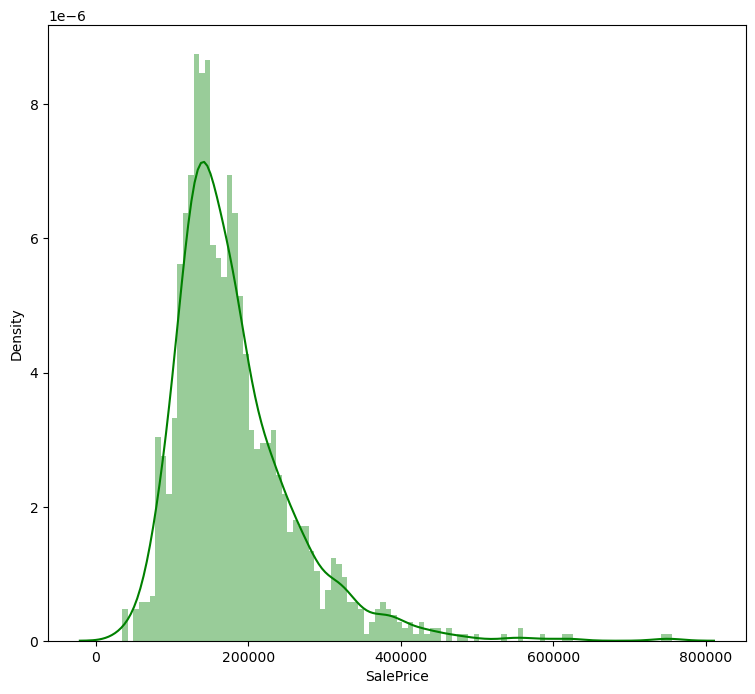

In [12]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### From the above plot,we can see that the prices are skewed right and there are some outliers which lies beyond 500,000.In order to have a normally distributed dependent variable we will get rid of the outliers in the later steps.

## Numerical data distribution

Lets first list down all the data types in our dataset and select only the numerical ones.

In [13]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

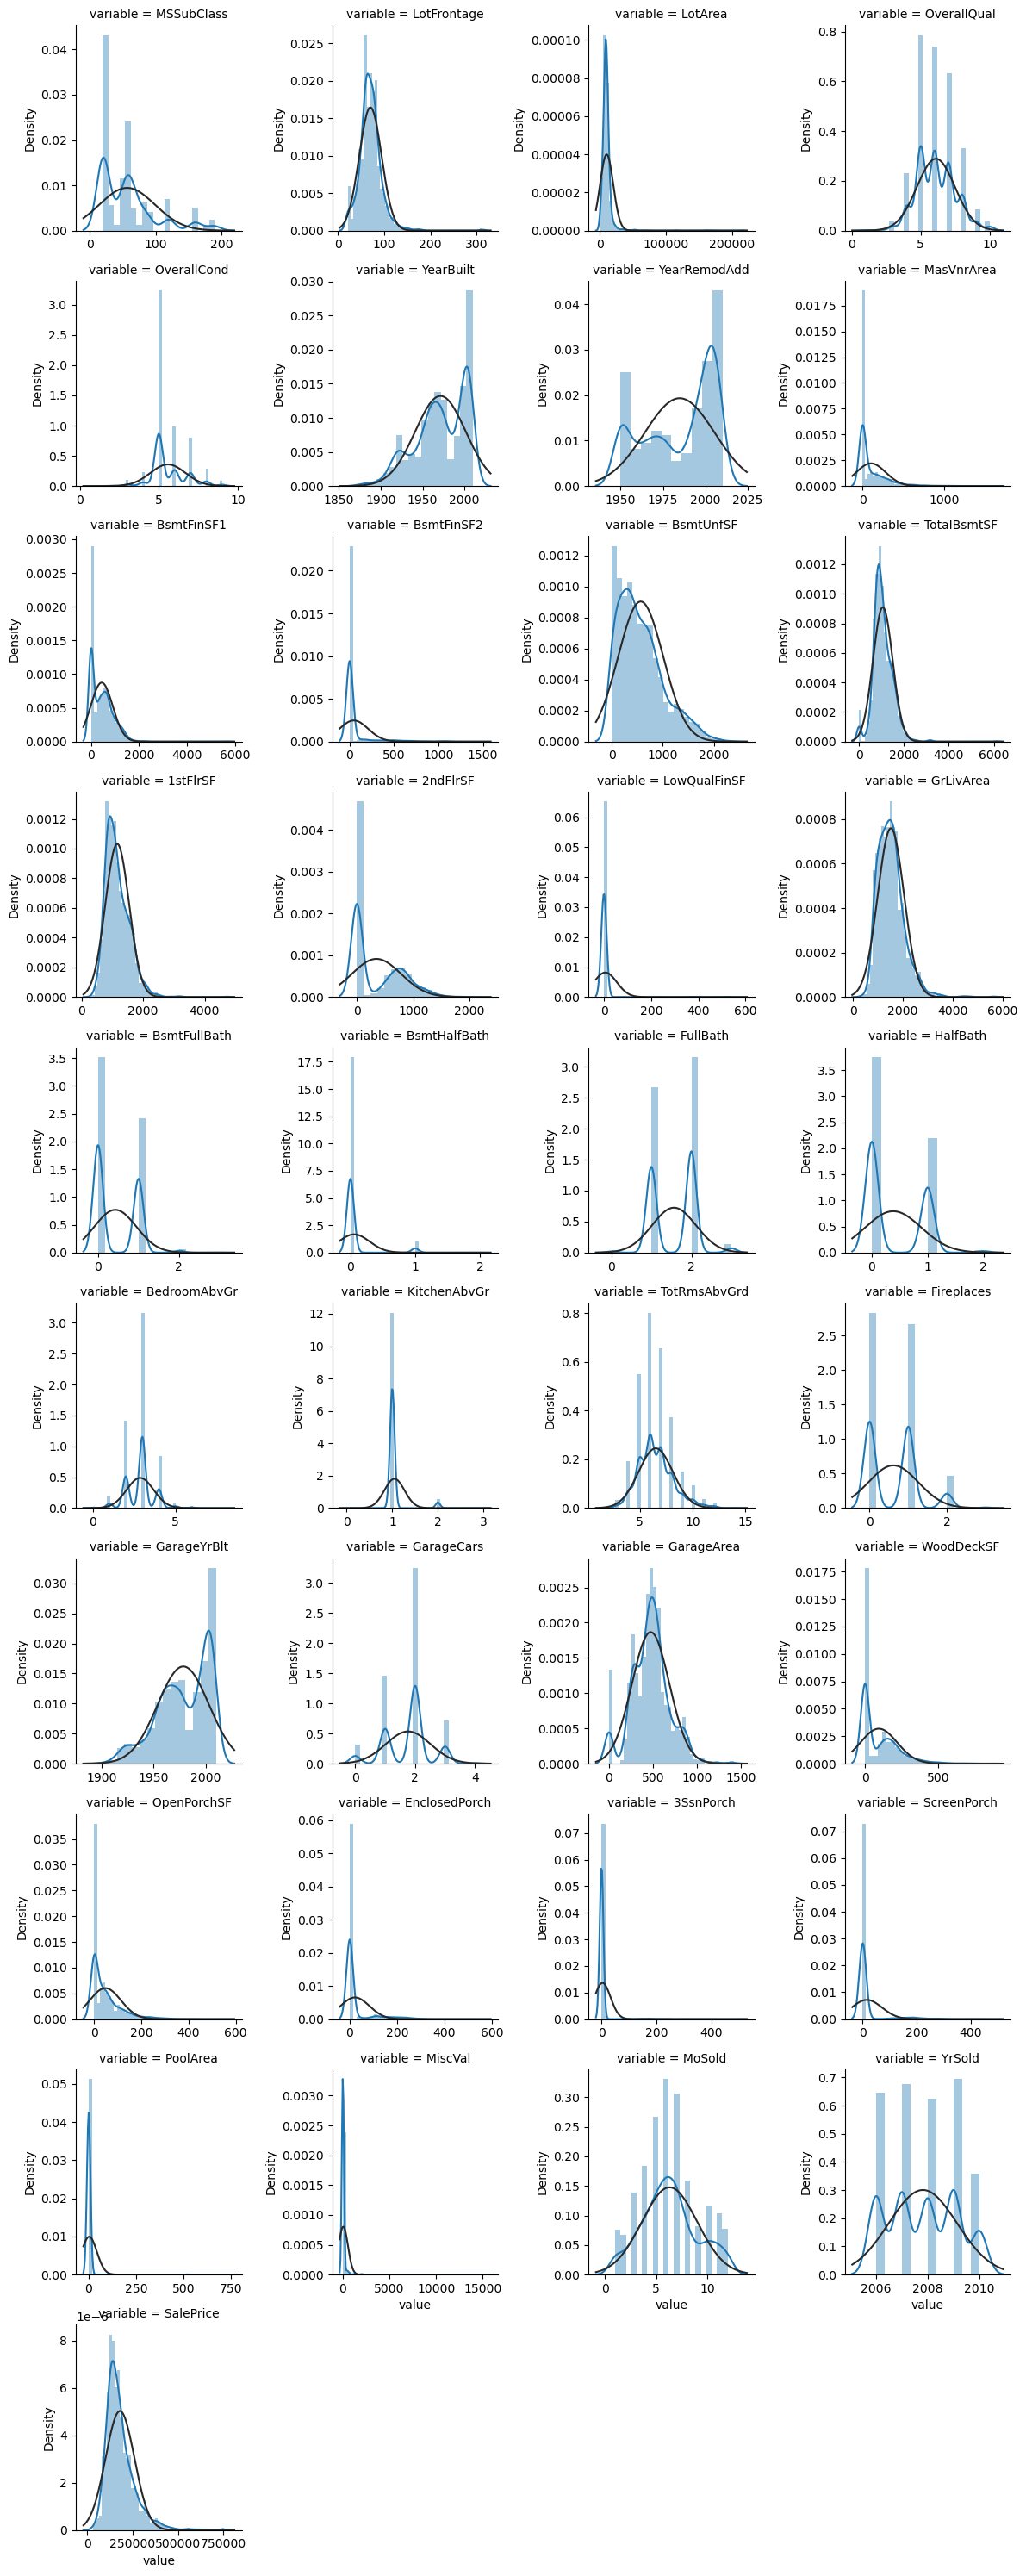

In [15]:
# Histogram to display skewness of every numeric variable
f = pd.melt(df_num, value_vars = df_num.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')

#### Features such as 1stFlrSF, TotalBsmtSF, LotFrontage, GrLiveArea... seems to share a similar distribution to the one we have with SalePrice.

# Categorical features

In [16]:
df_cat=df.select_dtypes(include='object')
df_cat.shape

(1460, 43)

In [17]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
df_cat.describe(include='all').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# Data Preprocessing

# Handling missing values:

In [19]:
all_data=pd.concat([train,test])

In [20]:
print(all_data.shape)
all_data = all_data.reset_index(drop=True)

(2919, 81)


In [21]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,NaN,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,NaN,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,NaN,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,NaN,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [22]:
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [23]:
nan_all_data = (all_data.isnull().sum())*100/all_data.shape[0]
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df


,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
Id,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageFinish,5.447071
GarageQual,5.447071


In [24]:
#delet some features with very high number of missing values.
all_data.drop(['PoolQC','Alley','Fence','Id','MiscFeature','FireplaceQu'],axis=1,inplace=True)

test.drop(['PoolQC','Alley','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
df.drop(['PoolQC','Alley','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

float64
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


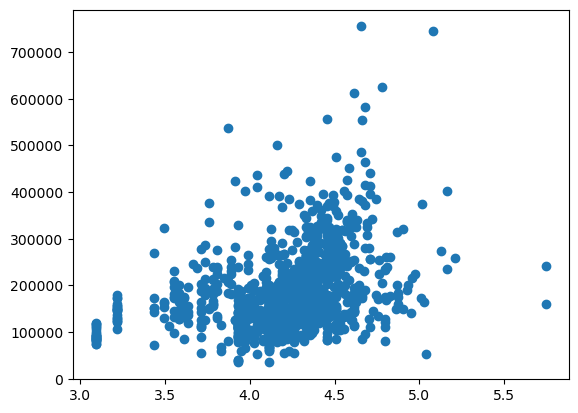

In [25]:
#Lot Frontage
print(df['LotFrontage'].dtype)
plt.scatter(x=np.log1p(df['LotFrontage']),y=df['SalePrice'])
print(df['LotFrontage'].describe())


#### There is some relation between lot area and sale price, so instead of dropping the column i will impute the values with mean

In [26]:
all_data['LotFrontage'].fillna(np.mean(all_data['LotFrontage']),inplace=True)

In [27]:
# these features eg like garage qual,cond,finish,type seems to be important and relevant for buying car.
# fill them with the 'none' for categorical and 0 for numeric as nan here implies that there is no garage.

all_data['GarageYrBlt'].fillna(0,inplace=True)

all_data['GarageArea'].fillna(0,inplace=True)

all_data['GarageCars'].fillna(0,inplace=True)

all_data['GarageQual'].fillna('None',inplace=True)

all_data['GarageFinish'].fillna('None',inplace=True)

all_data['GarageCond'].fillna('None',inplace=True)

all_data['GarageType'].fillna('None',inplace=True)

In [28]:
# basement related features.
# missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)



In [29]:
# MasVnrArea 0 and MasVnrType 'None'.
all_data['MasVnrArea'].fillna(0,inplace=True)

all_data['MasVnrType'].fillna('None',inplace=True)

In [30]:
#other rem columns are all cat like kitchen qual etc.. and so filled with mode.
for col in ['MSZoning','Functional','SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical','Utilities']:
  all_data[col].fillna(all_data[col].mode()[0],inplace=True)

In [31]:
nan_all_data = (all_data.isnull().sum())*100/all_data.shape[0]
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

,Missing Ratio


In [32]:
#one hot encoding using OneHotEncoder of Scikit-Learn

from sklearn.preprocessing import OneHotEncoder

categorical_columns = all_data.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(all_data[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([all_data, one_hot_df], axis=1)

all_data = df_encoded.drop(categorical_columns, axis=1)

all_data


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
train=all_data.loc[:(df.shape)[0]+2,:]
test=all_data.loc[(df.shape)[0]+2:,:]

In [34]:
train['SalePrice']=df['SalePrice']
train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)
train.shape
print(train['SalePrice'].isnull().sum())

0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8928\2475089275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice']=df['SalePrice']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8928\2475089275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)


In [35]:
print(train.shape)
print(test.shape)

(1463, 280)
(1457, 279)


## Handling Skewness

In [36]:
# ##Log transform numeric features
# train['SalePrice']=np.log1p(train['SalePrice'])
# train.head()

## Handling Outliers

In [37]:
def remove_outliers(df, column):

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

print(f"Original shape: {train.shape}")
train = remove_outliers(train, 'SalePrice')
train = remove_outliers(train, 'LotFrontage')
train = remove_outliers(train, 'TotalBsmtSF')
train = remove_outliers(train, 'LotArea')
train = remove_outliers(train, 'GrLivArea')
train = remove_outliers(train, 'GarageArea')
print(f"Shape after outlier removal: {train.shape}")

Original shape: (1463, 280)
Shape after outlier removal: (1163, 280)


## Correlation

#### We'll try to find which features are strongly correlated with SalePrice. we'll store them in a variable called golden_features.

In [38]:
cat_corr = train.corrwith(train['SalePrice'], method='pearson')
golden_features = cat_corr[abs(cat_corr) > 0.4].sort_values(ascending=False)
golden_features = golden_features.drop('SalePrice')
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features), golden_features))

There is 24 strongly correlated values with SalePrice:
OverallQual            0.801665
GrLivArea              0.666724
YearBuilt              0.648920
GarageCars             0.642052
GarageArea             0.618406
FullBath               0.599910
ExterQual_Gd           0.597798
Foundation_PConc       0.567372
YearRemodAdd           0.565748
TotalBsmtSF            0.553573
1stFlrSF               0.520843
HeatingQC_Ex           0.483850
KitchenQual_Gd         0.474227
BsmtFinType1_GLQ       0.448402
TotRmsAbvGrd           0.445050
GarageType_Attchd      0.436542
BsmtQual_Gd            0.434073
BsmtQual_Ex            0.414571
Exterior1st_VinylSd    0.405981
GarageType_Detchd     -0.408990
GarageFinish_Unf      -0.462113
KitchenQual_TA        -0.553350
BsmtQual_TA           -0.563471
ExterQual_TA          -0.632425
dtype: float64


In [39]:
corr_spearman = train.corrwith(train['SalePrice'], method='kendall')
golden_features_sp = cat_corr[abs(cat_corr) > 0.4].sort_values(ascending=False)
golden_features_sp = golden_features_sp.drop('SalePrice')
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_sp), golden_features_sp))

There is 24 strongly correlated values with SalePrice:
OverallQual            0.801665
GrLivArea              0.666724
YearBuilt              0.648920
GarageCars             0.642052
GarageArea             0.618406
FullBath               0.599910
ExterQual_Gd           0.597798
Foundation_PConc       0.567372
YearRemodAdd           0.565748
TotalBsmtSF            0.553573
1stFlrSF               0.520843
HeatingQC_Ex           0.483850
KitchenQual_Gd         0.474227
BsmtFinType1_GLQ       0.448402
TotRmsAbvGrd           0.445050
GarageType_Attchd      0.436542
BsmtQual_Gd            0.434073
BsmtQual_Ex            0.414571
Exterior1st_VinylSd    0.405981
GarageType_Detchd     -0.408990
GarageFinish_Unf      -0.462113
KitchenQual_TA        -0.553350
BsmtQual_TA           -0.563471
ExterQual_TA          -0.632425
dtype: float64


<AxesSubplot:>

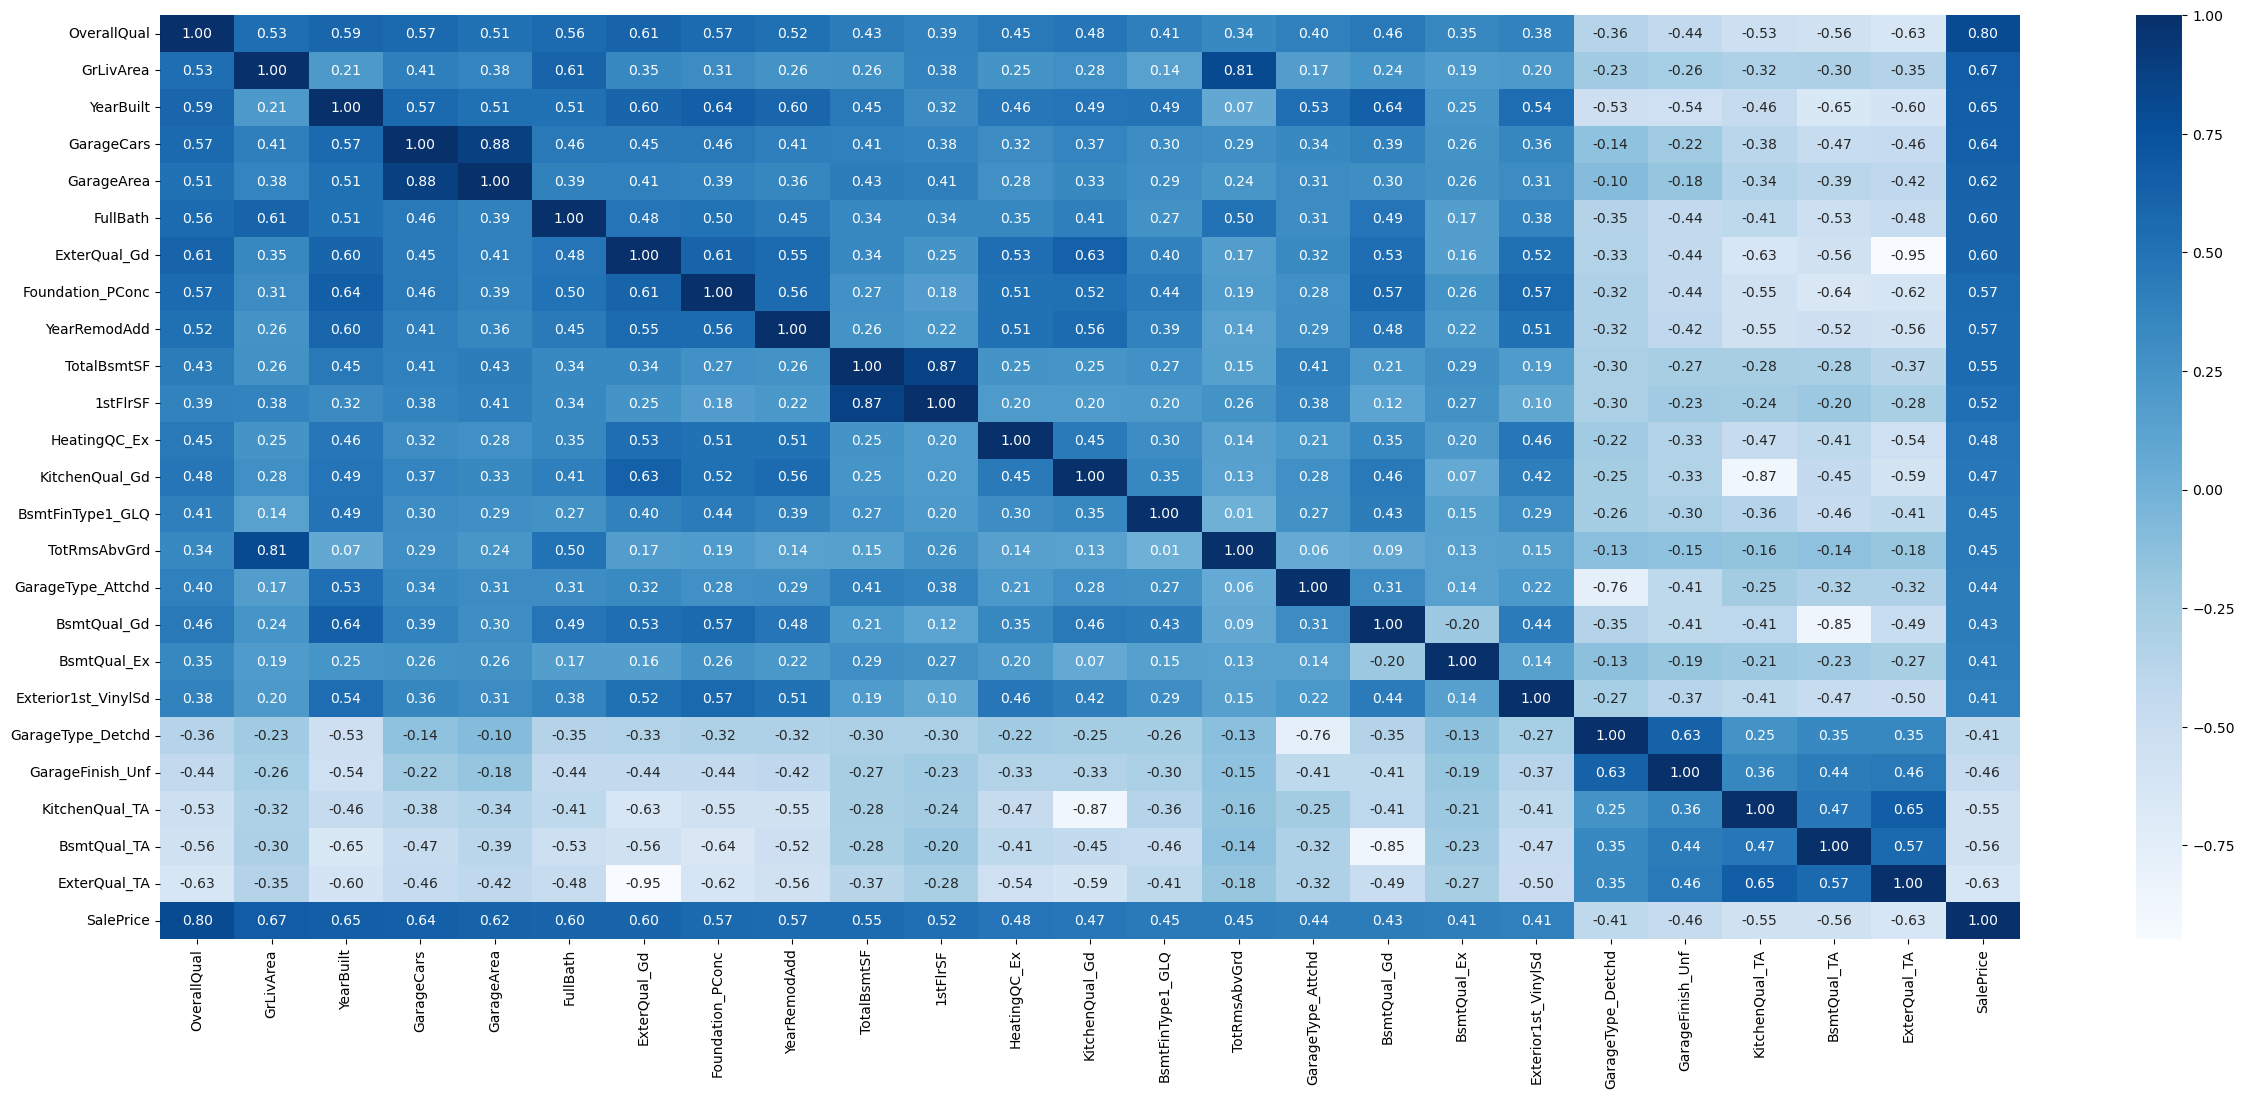

In [40]:
##Plotting a correlation plot
cor_mat= train[list(golden_features.index) + ['SalePrice']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,annot=True,cbar=True,fmt='.2f',cmap='Blues')

In [41]:
##Splitting data into train and test datasets
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((930, 279), (233, 279))

## Scaling Fearures

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Regression model

In [43]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [44]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math

## Linear regression

In [45]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
print('LinearRegressio Train : ')
y_pred = lr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

LinearRegressio Train : 
MAE is 9419.669027839152
MSE is 177389775.23676246
R2 score is 0.9421884322603175
RMSE score is 13318.775290422256


In [47]:
print('LinearRegressio Test : ')
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

LinearRegressio Test : 
MAE is 13176.62660944206
MSE is 316974321.8969957
R2 score is 0.9014861555208263
RMSE score is 17803.772687186156


## Lasso

In [48]:
reg_lasso=Lasso()
reg_lasso.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.148e+08, tolerance: 2.854e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [49]:
print('Lasso Train : ')
y_pred = reg_lasso.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Lasso Train : 
MAE is 9437.585395280224
MSE is 177655576.89256474
R2 score is 0.9421018071410893
RMSE score is 13328.750012381684


In [50]:
print('Lasso Test : ')
y_pred = reg_lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Lasso Test : 
MAE is 12995.297449881195
MSE is 311859905.69439137
R2 score is 0.9030756874405409
RMSE score is 17659.55564827132


## Ridge

In [51]:
reg_ridge=Ridge()
reg_ridge.fit(X_train,y_train)

Ridge()

In [52]:
print('Ridge Train : ')
y_pred = reg_ridge.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Ridge Train : 
MAE is 9630.755604994338
MSE is 183818581.56679365
R2 score is 0.9400932755798501
RMSE score is 13557.971144931444


In [53]:
print('Ridge Test : ')
y_pred = reg_ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Ridge Test : 
MAE is 12355.444103466665
MSE is 283097590.05197257
R2 score is 0.9120148540995326
RMSE score is 16825.50415446659
